In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pandas Warm-Up

In [2]:
df = pd.DataFrame()
df['Group'] = ['A', 'B', 'C']
df['Type'] = ['Control', 'Treatment', 'Treatment']
df['Average Weight'] = [61.2, 59.6, 63.4]
df['Average Bilirubin Level'] = [6.3, 4.8, 4.9]
df['Average Hemoglobin Level'] = [12.3, 13.8, 12.1]
df

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
0,A,Control,61.2,6.3,12.3
1,B,Treatment,59.6,4.8,13.8
2,C,Treatment,63.4,4.9,12.1


## Giving Tables Some Style

  - **Get Styler Version of DataFramte**: `df.style`
  - **Styler Methods**: `background_gradient()`, `highlight_min()`, `highlight_max()`, `set_caption()`, `format()`, `hide_index()`, `relabel_index()`
    - `props=` in each of these methods takes a CSS style string to set colors and fonts (see example below)
  - **Style Ouptut**: `to_latex()`, `to_excel()`, `to_html()`


** 

*Example*: Show the Table, highlighting the minimum values in each column.  For the highlighted cells, set the cell background to light grey and the font to black.

NameError: name 'pandas' is not defined

In [3]:
df.style.highlight_min(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: darkgrey; color: black;')

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
0,A,Control,61.200000,6.300000,12.300000
1,B,Treatment,59.600000,4.800000,13.800000
2,C,Treatment,63.400000,4.900000,12.100000


*Example*: Show the Table, highlighting the maximum values in each column.  For the highlighted cells, set the cell background to light green and the font to black.

In [4]:
df.style.highlight_max(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: lightgreen; color: black;')

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
0,A,Control,61.200000,6.300000,12.300000
1,B,Treatment,59.600000,4.800000,13.800000
2,C,Treatment,63.400000,4.900000,12.100000


Highlight both the min and max by chaining the two methods together (`df.style.highlight_min().highligh_max()`), making the max values with a lightgreen background and the min values with a pink background.

Tip: You can split method chains in Python into multiple lines by putting round brackets around the whole chain:

```python
(
    df
    .style
    .highlight_min()
    .highligh_max()
)
```

In [13]:
(
    df
    .style
    .highlight_min(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: pink; color: black;')
    .highlight_max(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: lightgreen; color: black;')
)

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
0,A,Control,61.200000,6.300000,12.300000
1,B,Treatment,59.600000,4.800000,13.800000
2,C,Treatment,63.400000,4.900000,12.100000


Change all cell colors to show their order using a background gradient

In [14]:
(
    df
    .style
    .background_gradient()
)

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
0,A,Control,61.200000,6.300000,12.300000
1,B,Treatment,59.600000,4.800000,13.800000
2,C,Treatment,63.400000,4.900000,12.100000


Export the Styled table with background gradient to Latex:

In [16]:
(
    df
    .style
    .background_gradient()
    .to_latex('table1.tex')
)

Export the Styled table with highlighted min and max to HTML, hiding the index column:

In [17]:
(
    df
    .style
    .highlight_min(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: pink; color: black;')
    .highlight_max(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: lightgreen; color: black;')
    .hide_index()
    .to_latex('table2.tex')
)

/tmp/ipykernel_1841/577447101.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df


Export the Styled table with highlighted min and max to Excel, adding the caption "Average Patient Group Data":

In [23]:
indf =(
    df
    .style
    .highlight_min(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: pink; color: black;')
    .highlight_max(['Average Weight', 'Average Bilirubin Level', 'Average Hemoglobin Level'], props='background-color: lightgreen; color: black;')
    .set_caption("Average Patient Group Data")    
)
indf.to_excel('table2.xlsx')
indf

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
0,A,Control,61.200000,6.300000,12.300000
1,B,Treatment,59.600000,4.800000,13.800000
2,C,Treatment,63.400000,4.900000,12.100000


## Plotting With Pandas

Plotting Matplotlib Plots with Pandas is often straightforward:

  - Calling Matplotlib function directly: (e.g. `plt.bar(df['Group'], df['Weight'])`)
  - Or calling Dataframe Plotter methods directly: (e.g. `df.plot.bar('Group', 'Weight')`)
  - Or calling `df.plot()` as a high-level method: (e.g. `df.plot('Group', 'Weight', kind='bar')`)

Saving the most-recent figure is usually still done with matplotlib's `plt.figsave()` function, regardless of whether the plot is made with Matplotlib or Pandas functions.

**Exercises**: Let's try it out!

*Example*: Using Matplotlib directly, make a bar plot showing the average weight of each group. Save it to a file named `example.png`:

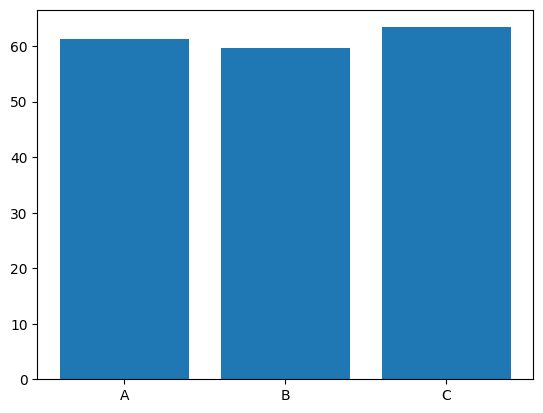

In [24]:
plt.bar(df['Group'], df['Average Weight']);
plt.savefig('example.ignore.png')

*Example*: This time using Pandas directly, make a bar plot showing the average weight of each group (be sure to label the axes). Save it to a file named `example2.png`:

<AxesSubplot: xlabel='Group', ylabel='Average Weight'>

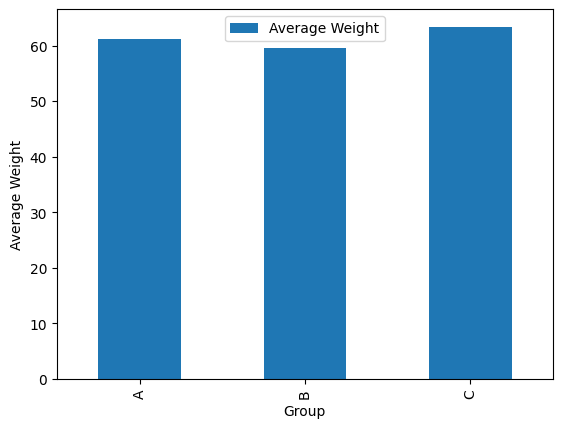

In [27]:
df.plot(x = 'Group', y = 'Average Weight', ylabel = "Average Weight",kind = 'bar')

Using Matplotlib directly, make a bar plot showing the average bilirubin levels by patient group.  Save the figure to `bili.png`

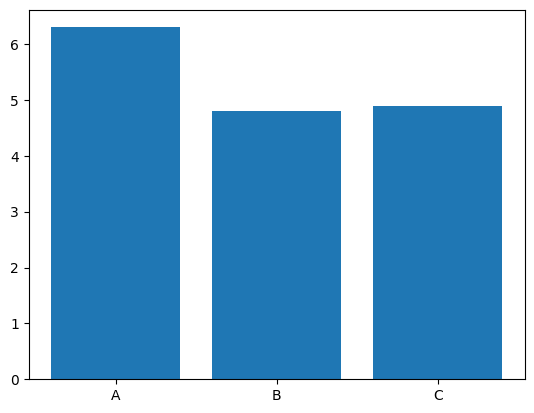

In [33]:
plt.bar(df['Group'], df['Average Bilirubin Level'])
plt.savefig("bili.png") # AttributeError: 'BarContainer' object has no attribute 'savefig'


*Example*: This time using Pandas directly, make a bar plot showing the average bilirubin level of each group (be sure to label the axes). Save it to a file named `bili2.png`:

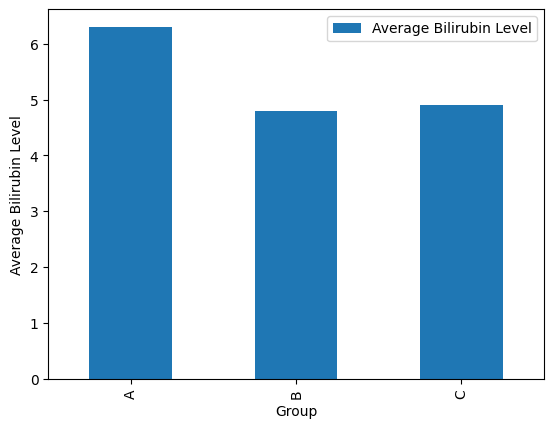

In [34]:
df.plot(x = 'Group', y = 'Average Bilirubin Level', ylabel = "Average Bilirubin Level",kind = 'bar')
plt.savefig("bili2.png")

Call the `df.plot()` function with no arguments and see what happens.  Try tweaking the parameters of the function to make things more clear or interesting, maing three different figures with their own unique layouts and looks.  Take a look at the options here: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html#pandas-dataframe-plot


<AxesSubplot: xlabel='Average Weight', ylabel='Average Bilirubin Level'>

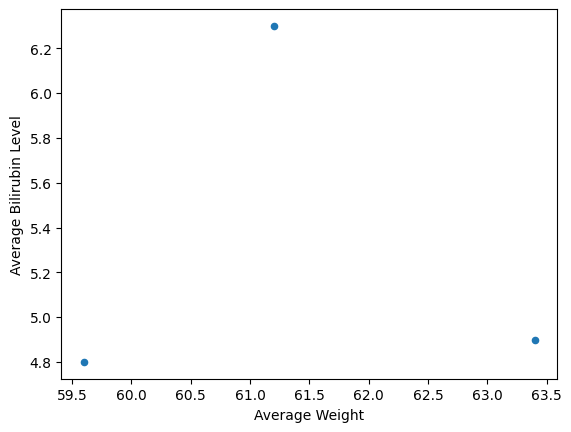

In [41]:
df.plot(x= 'Average Weight', y = 'Average Bilirubin Level', kind = 'scatter')

In [48]:
list(df.columns)

(['Group',
  'Type',
  'Average Weight',
  'Average Bilirubin Level',
  'Average Hemoglobin Level'],
 Index(['Type', 'Average Weight'], dtype='object'))

In [49]:
df[['Type', 'Average Weight']]

,Type,Average Weight
0,Control,61.2
1,Treatment,59.6
2,Treatment,63.4


In [50]:
list(df.columns).index('Type')

1

In [51]:
pd.DataFrame(list(df.columns))

,0
0,Group
1,Type
2,Average Weight
3,Average Bilirubin Level
4,Average Hemoglobin Level


In [52]:
df.iloc[1:2]

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
1,B,Treatment,59.6,4.8,13.8


In [54]:
df.index = ["NE", "DE", "UK"]
df

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
NE,A,Control,61.2,6.3,12.3
DE,B,Treatment,59.6,4.8,13.8
UK,C,Treatment,63.4,4.9,12.1


In [55]:
df.iloc[0]

Group                             A
Type                        Control
Average Weight                 61.2
Average Bilirubin Level         6.3
Average Hemoglobin Level       12.3
Name: NE, dtype: object

In [56]:
df.loc['NE':'UK']

,Group,Type,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
NE,A,Control,61.2,6.3,12.3
DE,B,Treatment,59.6,4.8,13.8
UK,C,Treatment,63.4,4.9,12.1


In [57]:
df[['Group','Average Bilirubin Level']]

,Group,Average Bilirubin Level
NE,A,6.3
DE,B,4.8
UK,C,4.9


In [58]:
df.info() # string type is shown as object

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, NE to UK
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     3 non-null      object 
 1   Type                      3 non-null      object 
 2   Average Weight            3 non-null      float64
 3   Average Bilirubin Level   3 non-null      float64
 4   Average Hemoglobin Level  3 non-null      float64
dtypes: float64(3), object(2)
memory usage: 252.0+ bytes


In [59]:
df.describe()

,Average Weight,Average Bilirubin Level,Average Hemoglobin Level
count,3.000000,3.000000,3.000000
mean,61.400000,5.333333,12.733333
std,1.907878,0.838650,0.929157
min,59.600000,4.800000,12.100000
25%,60.400000,4.850000,12.200000
50%,61.200000,4.900000,12.300000
75%,62.300000,5.600000,13.050000
max,63.400000,6.300000,13.800000


<AxesSubplot: ylabel='Frequency'>

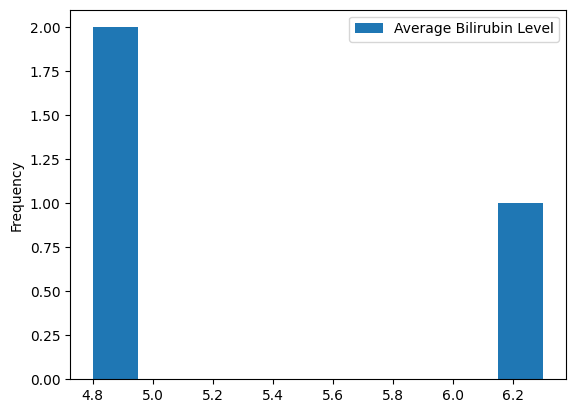

In [45]:
df.plot(x= 'Average Weight', y = 'Average Bilirubin Level', xlabel= 'Average Weight', kind = 'hist')

array([[<AxesSubplot: title={'center': 'Average Weight'}>,
        <AxesSubplot: title={'center': 'Average Bilirubin Level'}>],
       [<AxesSubplot: title={'center': 'Average Hemoglobin Level'}>,
        <AxesSubplot: >]], dtype=object)

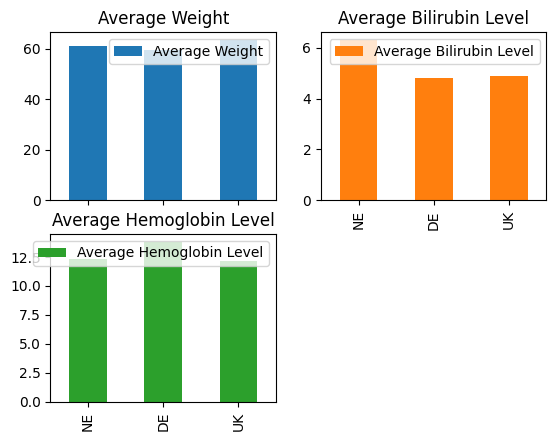

In [62]:
df.plot(subplots = True, kind = 'bar', layout = (2,2))

<AxesSubplot: ylabel='Density'>

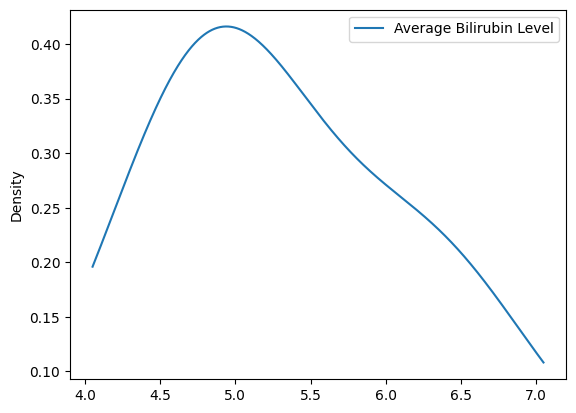

In [44]:
df.plot(x= 'Average Weight', y = 'Average Bilirubin Level', kind = 'kde')

In [65]:
df['Type'].value_counts(normalize = True)

Treatment    0.666667
Control      0.333333
Name: Type, dtype: float64

In [66]:
df.mean(numeric_only=True)

Average Weight              61.400000
Average Bilirubin Level      5.333333
Average Hemoglobin Level    12.733333
dtype: float64